# Periodic features

[Feature Engineering for Machine Learning Course](https://www.trainindata.com/p/feature-engineering-for-machine-learning)

Periodic features are those that repeat their values at regular intervals, like the hour, the days of a week, and the months of a year.

With cyclical or periodic features, values that are very different in absolute magnitude are actually close. For example, January is close to December, even though their absolute magnitude suggests otherwise.

We can use periodic functions like sine and cosine, to transform cyclical features and help machine learning models  pick up their intrinsic nature.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# to automate many of our engineering processes
from feature_engine.creation import CyclicalFeatures
from feature_engine.datetime import DatetimeFeatures

from sklearn.pipeline import Pipeline

In [71]:
filename = '../../Datasets/AirQualityUCI_ready.csv'

data = pd.read_csv(filename)

data.head()

,Date_Time,CO_sensor
0,2004-10-03 18:00:00,1360.0
1,2004-10-03 19:00:00,1292.0
2,2004-10-03 20:00:00,1402.0
3,2004-10-03 21:00:00,1376.0
4,2004-10-03 22:00:00,1272.0


2004-04-04 00:00:00
2005-04-04 14:00:00
Number of observations: 7,393


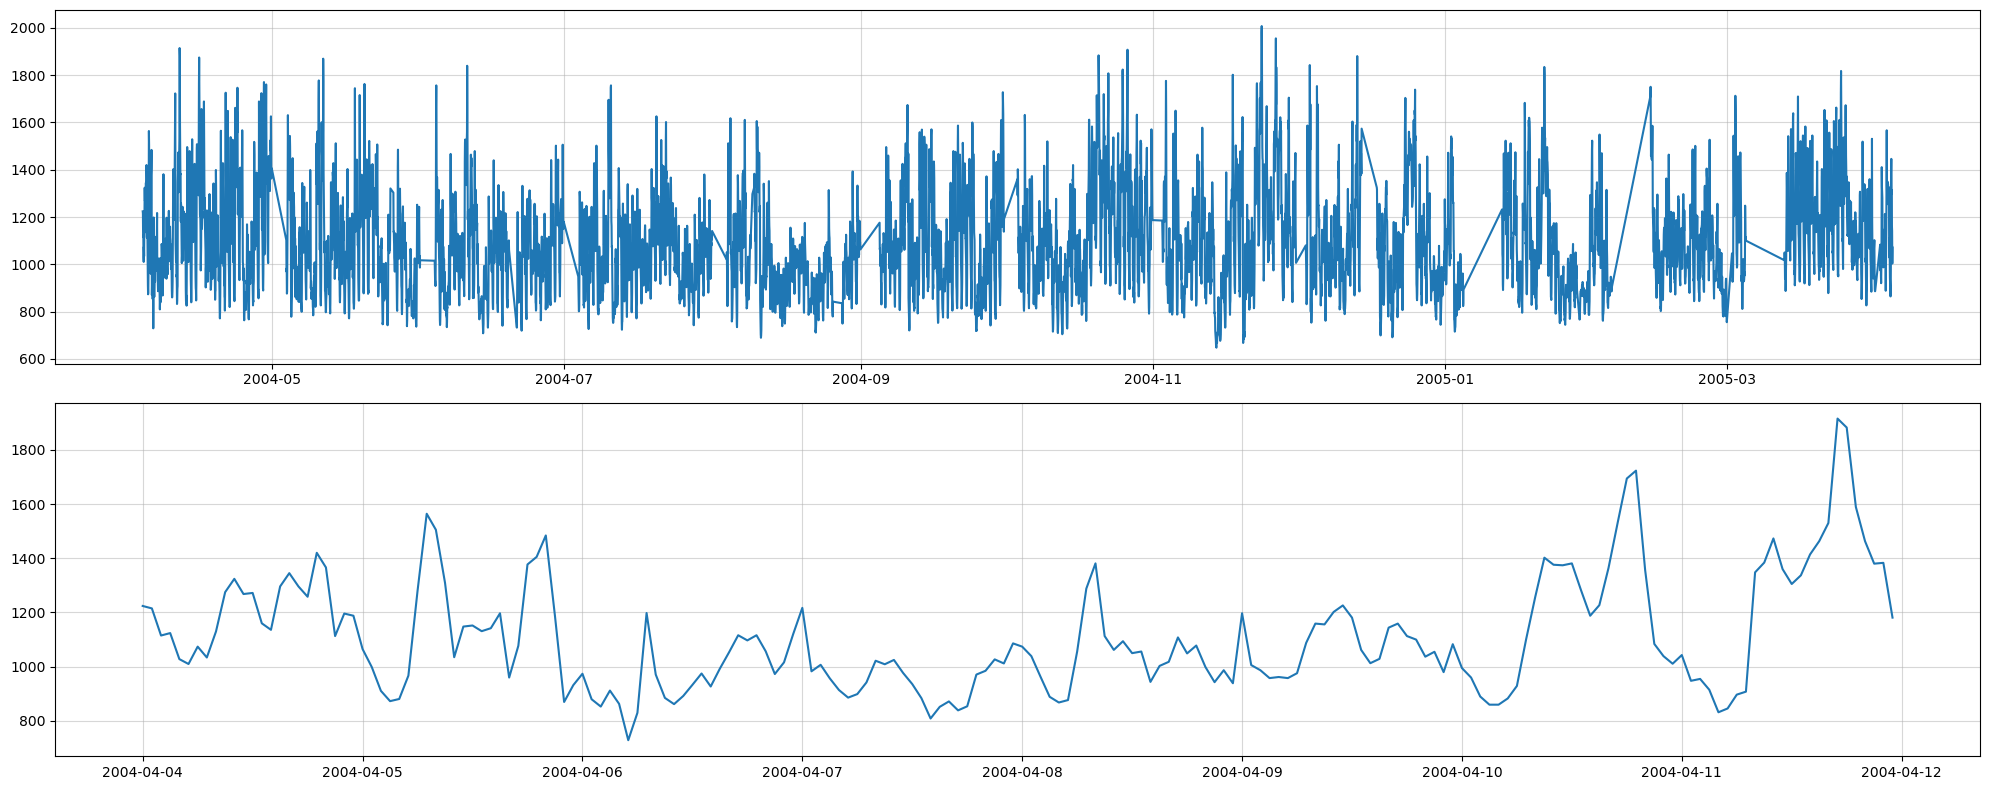

In [35]:
# omd

import matplotlib.pyplot as plt 

data['Date_Time'] = pd.to_datetime(data['Date_Time'])
data.sort_values(by='Date_Time', inplace=True)
data.set_index('Date_Time', inplace=True)

print(data.index[0])
print(data.index[-1])
print(f"Number of observations: {data.shape[0]:,.0f}")

plt.figure(figsize=(20,8))
plt.subplot(2, 1, 1)
plt.plot(data.CO_sensor)
plt.grid(True, alpha=0.5)

plt.subplot(2, 1, 2)
plt.plot(data.loc['2004-04-04':'2004-04-11']['CO_sensor'])
plt.grid(True, alpha=0.5)

plt.tight_layout()
plt.show()

In [68]:
# omd

from datetime import date

def get_weekday_name(date):
    day_mapping = {0 : 'Monday', 1 : 'Tuesday', 2 : 'Wednesday', 3 : 'Thursday', 4 : 'Friday', 5 : 'Saturday', 6 : 'Sunday'}
    print(f"{date} = {day_mapping.get(date.weekday())}")

for day in data.loc['2004-04-04':'2004-04-11'].index:
    get_weekday_name(day)

2004-04-04 00:00:00 = Sunday
2004-04-04 01:00:00 = Sunday
2004-04-04 02:00:00 = Sunday
2004-04-04 03:00:00 = Sunday
2004-04-04 04:00:00 = Sunday
2004-04-04 05:00:00 = Sunday
2004-04-04 06:00:00 = Sunday
2004-04-04 07:00:00 = Sunday
2004-04-04 08:00:00 = Sunday
2004-04-04 09:00:00 = Sunday
2004-04-04 10:00:00 = Sunday
2004-04-04 11:00:00 = Sunday
2004-04-04 12:00:00 = Sunday
2004-04-04 13:00:00 = Sunday
2004-04-04 14:00:00 = Sunday
2004-04-04 15:00:00 = Sunday
2004-04-04 16:00:00 = Sunday
2004-04-04 17:00:00 = Sunday
2004-04-04 18:00:00 = Sunday
2004-04-04 19:00:00 = Sunday
2004-04-04 20:00:00 = Sunday
2004-04-04 21:00:00 = Sunday
2004-04-04 22:00:00 = Sunday
2004-04-04 23:00:00 = Sunday
2004-04-05 00:00:00 = Monday
2004-04-05 01:00:00 = Monday
2004-04-05 02:00:00 = Monday
2004-04-05 03:00:00 = Monday
2004-04-05 04:00:00 = Monday
2004-04-05 05:00:00 = Monday
2004-04-05 06:00:00 = Monday
2004-04-05 07:00:00 = Monday
2004-04-05 08:00:00 = Monday
2004-04-05 09:00:00 = Monday
2004-04-05 10:

In [72]:
# Cast date variable in datetime format.
data['Date_Time'] = pd.to_datetime(data['Date_Time'])

## Add temporal features

We will extract year, month and hour from the index.

In [73]:
# Get datetime features from the datetime variable
# and apply periodic transformation.

pipe = Pipeline([
    
    # create datetime features.
    ('datetime', DatetimeFeatures(
        variables="Date_Time",
        features_to_extract=["month", "hour"],
        drop_original=True,
    )),

    # apply sine and cosine transformation.
    ('cyclical', CyclicalFeatures(
        variables=["Date_Time_month", "Date_Time_hour"],
    )),
])

In [74]:
# Extract the features.

data = pipe.fit_transform(data)

data.head()

,CO_sensor,Date_Time_month,Date_Time_hour,Date_Time_month_sin,Date_Time_month_cos,Date_Time_hour_sin,Date_Time_hour_cos
0,1360.0,10,18,-0.866025,0.5,-0.979084,0.203456
1,1292.0,10,19,-0.866025,0.5,-0.887885,0.460065
2,1402.0,10,20,-0.866025,0.5,-0.730836,0.682553
3,1376.0,10,21,-0.866025,0.5,-0.519584,0.854419
4,1272.0,10,22,-0.866025,0.5,-0.269797,0.962917


# Compare model performance

Now, let's compare the performance of a model trained with the raw features or the trigonometric transformed features.

**NOTE**: I am going to do a quick and dirty job to prove my point. Keep in mind that we should split the data into a train and a test set or use cross-validation to have an accurate measure of the model performance.

In [75]:
from sklearn.linear_model import Lasso

In [76]:
# Lasso regression.

reg = Lasso(random_state=10)

In [9]:
# Fit Lasso to the raw inputs.

reg.fit(data[["Date_Time_month", "Date_Time_hour"]], data["CO_sensor"])

# Get the R2
reg.score(data[["Date_Time_month", "Date_Time_hour"]], data["CO_sensor"])

0.10359654878036195

In [77]:
# Capture the trigonometrically transformed variables in a list.

trig_vars = [var for var in data.columns if 'sin' in var or 'cos' in var]

trig_vars

['Date_Time_month_sin',
 'Date_Time_month_cos',
 'Date_Time_hour_sin',
 'Date_Time_hour_cos']

In [78]:
data.head()

,CO_sensor,Date_Time_month,Date_Time_hour,Date_Time_month_sin,Date_Time_month_cos,Date_Time_hour_sin,Date_Time_hour_cos
0,1360.0,10,18,-0.866025,0.5,-0.979084,0.203456
1,1292.0,10,19,-0.866025,0.5,-0.887885,0.460065
2,1402.0,10,20,-0.866025,0.5,-0.730836,0.682553
3,1376.0,10,21,-0.866025,0.5,-0.519584,0.854419
4,1272.0,10,22,-0.866025,0.5,-0.269797,0.962917


In [79]:
# Fit Lasso with transformed inputs.

reg.fit(data[trig_vars], data["CO_sensor"])

# Get the R2.
reg.score(data[trig_vars], data["CO_sensor"])

0.13263074168408584

As we see, with the transformed features we improved the performance of the model by roughly 30%.

More details on working with temporal features in the [Scikit-learn docs](https://scikit-learn.org/stable/auto_examples/applications/plot_cyclical_feature_engineering.html#trigonometric-features)